In [2]:
import datetime 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset 

train = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\train.csv")
test = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\test.csv")
sample = pd.read_csv("E:\\Edubridge\\Kaggle\\Analytics\\sample.csv")

In [4]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [6]:
## Data Pre-Processing

In [7]:
# Converting datetime from object datatype to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [8]:
# Creating new column year using date column
# Year, Month, day, dayofyear, dayofweek, weekofyear, 

train['year'] = train['date'].dt.year
train['month']= train['date'].dt.month
train['day']= train['date'].dt.day
train['dayofyear']=train['date'].dt.dayofyear
train['weekday']= train['date'].dt.weekday
train['weekofyear'] = train['date'].dt.weekofyear

In [9]:
train.head()

,date,hour,demand,year,month,day,dayofyear,weekday,weekofyear
0,2018-08-18,9,91,2018,8,18,230,5,33
1,2018-08-18,10,21,2018,8,18,230,5,33
2,2018-08-18,13,23,2018,8,18,230,5,33
3,2018-08-18,14,104,2018,8,18,230,5,33
4,2018-08-18,15,81,2018,8,18,230,5,33


In [10]:
train.describe()

,hour,demand,year,month,day,dayofyear,weekday,weekofyear
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430,181.799090,3.025867,26.543706
std,6.544963,41.678988,0.810979,3.618189,8.772904,110.599321,2.003638,15.828694
min,0.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000,78.000000,1.000000,12.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000,185.000000,3.000000,27.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000,282.000000,5.000000,41.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000,366.000000,6.000000,53.000000


In [11]:
## Checking for the null values

train.isna().sum()

date          0
hour          0
demand        0
year          0
month         0
day           0
dayofyear     0
weekday       0
weekofyear    0
dtype: int64

In [12]:
train.shape

(18247, 9)

In [13]:
### Droppin the duplicates row from the dataset 

train.drop_duplicates(subset=None, inplace=True)

In [14]:
train.shape

(18247, 9)

<AxesSubplot:>

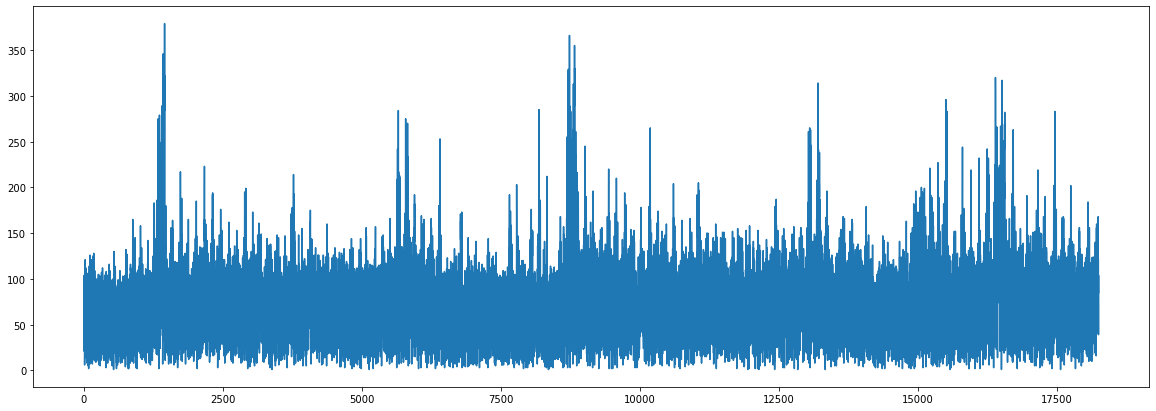

In [15]:
# Plotting demand over time
#train_date_index = train.set_index('date')

train["demand"].plot(figsize=(20, 7))

<Figure size 720x720 with 0 Axes>

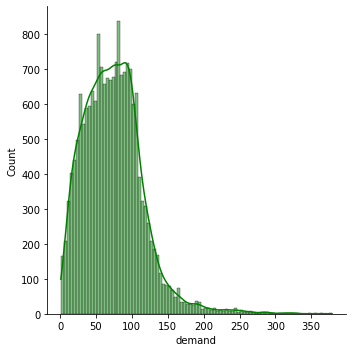

In [16]:
## Distribution for demand columns which is Right Skewed

plt.figure(figsize=(10,10))
sns.displot(train['demand'], kde=True, color='g')

<Figure size 720x720 with 0 Axes>

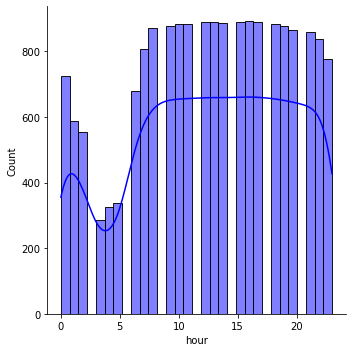

In [17]:
# Distribution of Hour Column 

plt.figure(figsize=(10,10))
sns.displot(train['hour'], kde=True, color='b')

Text(0.5, 1.0, 'Demand at Different Hours across Years')

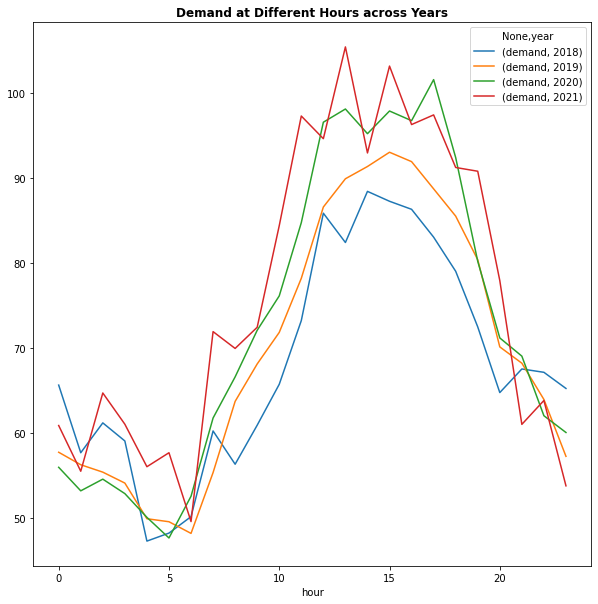

In [18]:
# Plotting demand across hours for each year

piv = pd.pivot_table(train, index=['hour'],columns=['year'], values=['demand'])

piv.plot(figsize=(10,10)).set_title('Demand at Different Hours across Years', fontweight="bold")

<AxesSubplot:xlabel='hour', ylabel='demand'>

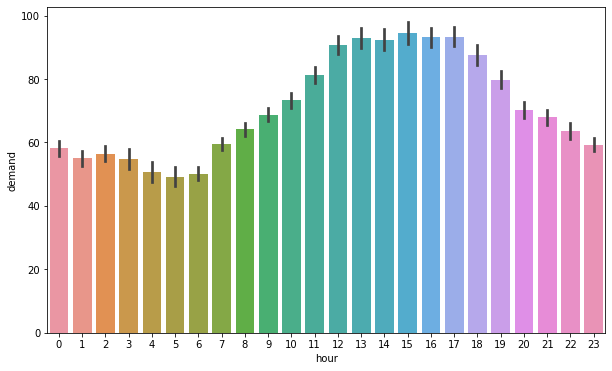

In [19]:
## Bar Plot demand using the hor

plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='demand', data=train)

### Observation from the above graphs 

1. The peak time of Renting the car is between 11:00 to 20:00 
2. Every Year the demand is Increasing as per the graphs 

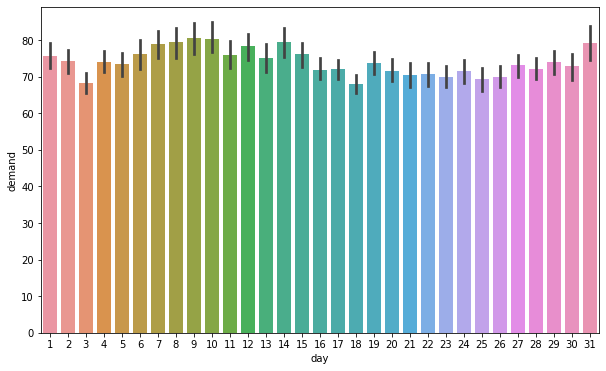

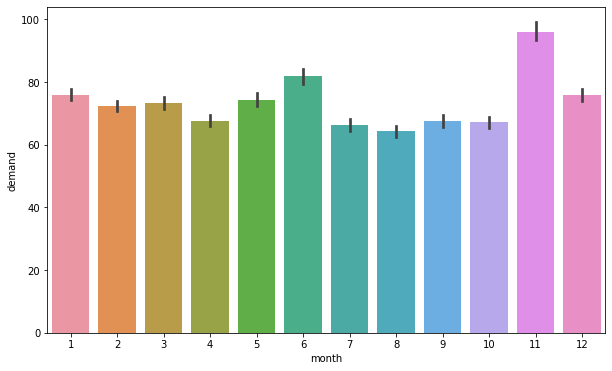

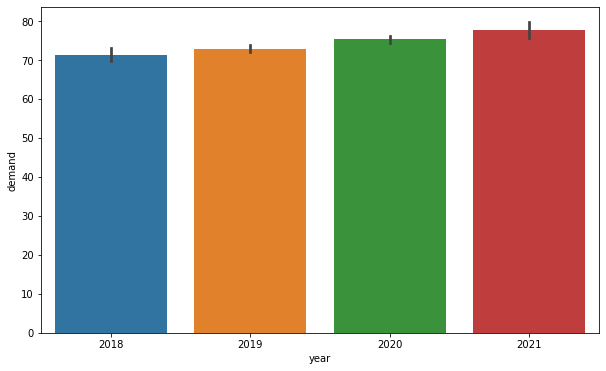

In [20]:
### Barplot for Damand according to the day, month, year

p = ['day', 'month', 'year']
for i in p:
    plt.figure(figsize=(10,6))
    sns.barplot(x=i, y='demand', data=train)

### Observations:
1. Peak Months of the rental is November and June is at the second place
2. Every Year car rental; business is increasing

In [21]:
train.head()

,date,hour,demand,year,month,day,dayofyear,weekday,weekofyear
0,2018-08-18,9,91,2018,8,18,230,5,33
1,2018-08-18,10,21,2018,8,18,230,5,33
2,2018-08-18,13,23,2018,8,18,230,5,33
3,2018-08-18,14,104,2018,8,18,230,5,33
4,2018-08-18,15,81,2018,8,18,230,5,33


In [22]:
# Feature Engineering
## Setting date column as Index

# train = train.reset_index('date')
# Dropping the date column
train = train.drop(columns=['date'])
train.head()

,hour,demand,year,month,day,dayofyear,weekday,weekofyear
0,9,91,2018,8,18,230,5,33
1,10,21,2018,8,18,230,5,33
2,13,23,2018,8,18,230,5,33
3,14,104,2018,8,18,230,5,33
4,15,81,2018,8,18,230,5,33


<AxesSubplot:>

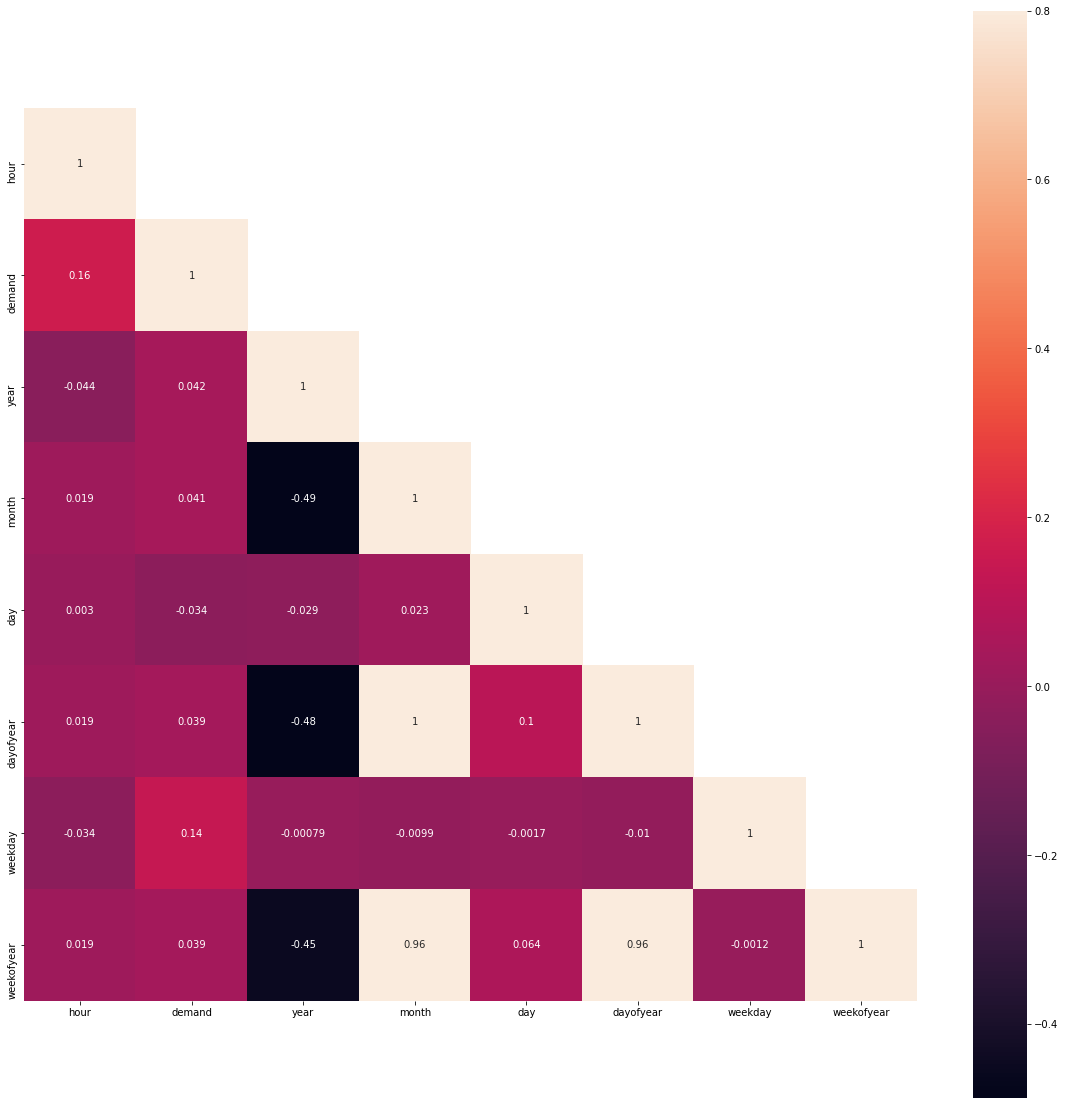

In [23]:
# Checking correlation between the Independent Variable

corr = train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corr, mask=mask, vmax=.8, square=True,annot=True )

WeekofYear and DayofYear are highly correlated are of not use is our model

In [24]:
## Deleting the column which are Highly correlated and will less contibute to the model

train.drop(['dayofyear', 'weekofyear'], axis=1, inplace=True)

In [25]:
train.head()

,hour,demand,year,month,day,weekday
0,9,91,2018,8,18,5
1,10,21,2018,8,18,5
2,13,23,2018,8,18,5
3,14,104,2018,8,18,5
4,15,81,2018,8,18,5


In [26]:
train['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
10    884
18    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

## Modelling

In [27]:
# Creating the list of features
feature_names = ['hour', 'year', 'month', 'day', 'weekday']
# Assigning the data corresponding to features in feature_names
X = train[feature_names]
y = train['demand']

In [28]:
# Here applying Statistical Analysis by using Generalised Linear Model Regression or Ordinary least-squares to Check the 
# relationship between the dependent and independent Variables
# So the Columns which has Value Greater than P-Value than Significance Value (0.05) are not Signicant for the target or less 
# Contribute for Target Variable 


from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as ms
from scipy import stats


X2 = ms.add_constant(X)
est = ms.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          1.44e-226
Time:                        11:41:40   Log-Likelihood:                -93423.
No. Observations:               18247   AIC:                         1.869e+05
Df Residuals:                   18241   BIC:                         1.869e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9206.1218    856.241    -10.752      0.0

In [29]:
# Importing Libraries for Model 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance

In [30]:
## Splitting the data into Training and Testing Set

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.01, random_state=41)

In [31]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)

In [32]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [33]:
# This below two Function Calculate RMSE, MSE, MAE, R2 Score for the Model


def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [34]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(mean_squared_log_error(test_pred,y_test))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
print(d)



{'Modelling Algo': ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'SVR', 'KNeighborsRegressor'], 'RMSLE': [0.3971642637077278, 0.47279527733852056, 0.4242828196803251, 0.4523748240540048, 0.42028728371070095]}


## Install the Module if not have 
###### LightGBM - LightGBM splits the tree leaf-wise as opposed to other boosting algorithms that grow tree level-wise. It chooses the leaf with maximum delta loss to grow. Since the leaf is fixed, the leaf-wise algorithm has lower loss compared to the level-wise algorithm.
pip install lightgbm

In [35]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(objective='regression', num_leaves=89,learning_rate=0.1,max_bin=200,min_sum_hessian_in_leaf = 20,
                        max_depth= 18,verbose=-1)

gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],
    eval_metric='l2_root',
    early_stopping_rounds=100)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
#print("-"*30)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=20, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=20
[1]	valid_0's rmse: 39.7011	valid_0's l2: 1576.17
[2]	valid_0's rmse: 38.4293	valid_0's l2: 1476.81
[3]	valid_0's rmse: 37.4123	valid_0's l2: 1399.68
[4]	valid_0's rmse: 36.5771	valid_0's l2: 1337.88
[5]	valid_0's rmse: 35.6774	valid_0's l2: 1272.87
[6]	valid_0's rmse: 35.1078	valid_0's l2: 1232.55
[7]	valid_0's rmse: 34.5828	valid_0's l2: 1195.97
[8]	valid_0's rmse: 34.0662	valid_0's l2: 1160.51
[9]	valid_0's rmse: 33.6527	valid_0's l2: 1132.51
[10]	valid_0's rmse: 33.316	valid_0's l2: 1109.96
[11]	valid_0's rmse: 33.143	valid_0's l2: 1098.46
[12]	valid_0's rmse: 32.9068	valid_0's l2: 1082.86
[13]	valid_0's rmse: 32.6757	valid_0's l2: 1067.7
[14]	valid_0's rmse: 32.5697	valid_0's l2: 1060.78
[15]	valid_0's rmse: 32.4448	valid_0's l2: 1052.66
[16]	valid_0's rmse: 32.3074	valid_0's l2: 1043.77
[17]	valid_0's rmse: 32.1948	valid_0's l2: 1036.5
[18]	val

In [36]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 28.426502732240436
MSE: 1149.076456284153
RMSE: 33.89803027145018
R2 Score: 0.32733635798500915


## Prediction

In [37]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [38]:
## Preparing the test dataset for predictions


test['year']= test['date'].dt.year
test['month']= test['date'].dt.month
test['day']= test['date'].dt.day
test['daayofweek']=test['date'].dt.year
# test['weekday']= test['date'].dt.weekday
# test['weekofyear'] = test['date'].dt.weekofyear

In [39]:
# Drop the date ccolumn as we have extracted the columns for our model

test = test.drop(columns=['date'])
test.head(10)

,hour,year,month,day,daayofweek
0,0,2021,3,1,2021
1,1,2021,3,1,2021
2,2,2021,3,1,2021
3,3,2021,3,1,2021
4,5,2021,3,1,2021
5,6,2021,3,1,2021
6,7,2021,3,1,2021
7,8,2021,3,1,2021
8,9,2021,3,1,2021
9,10,2021,3,1,2021


## Prediction Lightgbm Trained Model

In [40]:
## Prediction Using the Lightgbm Trained model

predict = gbm.predict(test)
print('Predicted labels', predict)
print('Actual labels',   y_test)

Predicted labels [63.94599849 63.28876395 63.28876395 ... 83.00109099 67.73219404
 61.96403878]
Actual labels 9158      91
12215    131
16587     72
5089      28
1370      58
        ... 
14050     42
10891     76
15984     53
398       87
15772    119
Name: demand, Length: 183, dtype: int64


In [41]:
# Round the Predictions because Demand is Integer

rounded = [round(x) for x in predict]
predict = rounded

In [42]:
## Storing the Submission DataFrame
date = sample['date']
submission = pd.DataFrame({
                  "date": date,
                  "hour": sample['hour'],
                  "demand": predict})
submission.head()

,date,hour,demand
0,2021-03-01,0,64
1,2021-03-01,1,63
2,2021-03-01,2,63
3,2021-03-01,3,63
4,2021-03-01,5,60


In [43]:
# Storing into Prediction into CSV file

submission.to_csv('Submission_Final.csv', index=False)

In [44]:
### Prediction With Random Forest Regressor

predict_rf = rf_model.predict(test)
print('Predicted labels', predict_rf)
print('Actual labels',   y_test)

Predicted labels [73.22 62.04 70.52 ... 66.01 46.99 66.99]
Actual labels 9158      91
12215    131
16587     72
5089      28
1370      58
        ... 
14050     42
10891     76
15984     53
398       87
15772    119
Name: demand, Length: 183, dtype: int64


In [45]:
# Round the Predictions because Demand is Integer

rounded = [round(x) for x in predict_rf]
predict_rf = rounded

In [46]:
# Storing to Submission DataFrame

date = sample['date']
submission = pd.DataFrame({
                  "date": date,
                  "hour": sample['hour'],
                  "demand": predict_rf})
submission.head()

,date,hour,demand
0,2021-03-01,0,73
1,2021-03-01,1,62
2,2021-03-01,2,71
3,2021-03-01,3,65
4,2021-03-01,5,54


In [47]:
# Storing into Prediction into CSV file

submission.to_csv('Submission_Final_RF.csv', index=False)